In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
df_train = pd.read_csv('train.csv' ,nrows=200000)
df_test = pd.read_csv('test.csv',nrows=200000)
df_members = pd.read_csv('members.csv',nrows=200000)
df_sample_submission = pd.read_csv('sample_submission.csv',nrows=200000)
df_song_extra_info = pd.read_csv('song_extra_info.csv',nrows=200000)
df_song = pd.read_csv('songs.csv',nrows=200000)

In [248]:
df_train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
199995,BcZDNjRuaLPaO6nHhP2y8gR5+wIjuz21C9gKOvC69oc=,Jqox3qZSYC1YzXheVSHb+bAsw/Xdo5iOxkiapo8pPz4=,listen with,Others profile more,listen-with,0
199996,BcZDNjRuaLPaO6nHhP2y8gR5+wIjuz21C9gKOvC69oc=,gWY6M1PeUg9uqeAWPZZvbvRTTLE/6u1dg28y38/MX+E=,listen with,Others profile more,listen-with,0
199997,BcZDNjRuaLPaO6nHhP2y8gR5+wIjuz21C9gKOvC69oc=,X96NEF2NcG6gyKVF0+U3H98CgAlgecjthmaqQe0nLPE=,listen with,Others profile more,listen-with,1
199998,BcZDNjRuaLPaO6nHhP2y8gR5+wIjuz21C9gKOvC69oc=,6fQNksvUL+j7dNfRf683g7j4mJjgrhHS7cfaOYoTLn0=,listen with,Others profile more,listen-with,0


In [249]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                200000 non-null  object
 1   song_id             200000 non-null  object
 2   source_system_tab   199424 non-null  object
 3   source_screen_name  190633 non-null  object
 4   source_type         199637 non-null  object
 5   target              200000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 9.2+ MB


In [250]:
df_test

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
199995,199995,ZJEcroFxdcnvHhwIBZ4Hsu0vw2U5OGt9ypN0N9cJAoU=,Wpky7HD5zNqHmv6gUwa0GkHoUARBxKuJ0ZdmZjnweXI=,my library,Local playlist more,local-library
199996,199996,7bXxZ7ZQ+kvXnS+8Np9j5TFJyCltWTtk02ISJNngJxY=,AvHbdwmAui0Gk2LaAJSqwxuutmAsvq5FASUdlwkq0+Y=,my library,NaN,top-hits-for-artist
199997,199997,XiVsXT316zcout2XExGChQwUSvRXgfFq65TRtmZbyQQ=,k1yz+EPGwgZqKJjYx5R/YBRW+085hl87uOTPRebX/pA=,radio,Radio,radio
199998,199998,XiVsXT316zcout2XExGChQwUSvRXgfFq65TRtmZbyQQ=,OZBGghDJW6bHxjqQEma9XV33mldF4UlIe5s/ZRxELSg=,radio,Radio,radio


In [251]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  200000 non-null  int64 
 1   msno                200000 non-null  object
 2   song_id             200000 non-null  object
 3   source_system_tab   199293 non-null  object
 4   source_screen_name  188281 non-null  object
 5   source_type         199374 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.2+ MB


In [252]:
df_members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [253]:
df_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [254]:
df_sample_submission

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
199995,199995,0.5
199996,199996,0.5
199997,199997,0.5
199998,199998,0.5


In [255]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   target  200000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.1 MB


In [256]:
df_song_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
199995,9inJp67xUzt+aJ4TiZP0ldzcHdkjgTUamvluXBE+4U8=,Der Kommissar| Pt. 2,DEA610101205
199996,k7NlDl3laqJEo+37urzMUPjQZVnEGZc69Qe4iC/+avY=,Ame,JPY200801783
199997,nImSDohV+aR7TPv+ywv6jZQWeKnPZsHSsq2Dg9ybkW0=,Rapaz De Bem,BREMI9400350
199998,Uac1iVaEO9VxvGMvwFkcucmTuScvGvnYDAW7LPWS8Vc=,The World Is On Fire,GBUM71600621


In [257]:
df_song_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   song_id  200000 non-null  object
 1   name     200000 non-null  object
 2   isrc     174811 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [258]:
df_song

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
199995,NmkDQIY78PY9VyYF32G1rlC3ElfYYGzMKFl2S7qTs/Q=,256441,465,Chris De Burgh,Chris De Burgh,NaN,52.0
199996,FUgaZV9PzmzBVO5pHYVAjl05B57N5FfLW4PItFnlWGo=,275644,465,潘越雲 (Michelle Pan),NaN,NaN,3.0
199997,88T/bBW1utVTSiQw3IQxpIyHzIVIbMB/Zo//FRCm4/A=,189413,1259,周立銘 (Andrew Chou),Jae Chong,Steven Lin| Luke Skywalker,3.0
199998,zCxV07lqZN52AWSCDuOCs2I388YPRFvY8V9uaq+3UxU=,241789,465,Gregorian,NaN,NaN,52.0


In [259]:
df_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   song_id      200000 non-null  object 
 1   song_length  200000 non-null  int64  
 2   genre_ids    195577 non-null  object 
 3   artist_name  200000 non-null  object 
 4   composer     114287 non-null  object 
 5   lyricist     50022 non-null   object 
 6   language     200000 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 10.7+ MB


In [260]:
df_song.describe()

,song_length,language
count,2.000000e+05,200000.00000
mean,2.473034e+05,27.57010
std,1.401997e+05,23.57971
min,1.253000e+03,-1.00000
25%,1.974078e+05,3.00000
50%,2.328030e+05,24.00000
75%,2.738090e+05,52.00000
max,6.448901e+06,59.00000


In [261]:
df_song.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [262]:
import seaborn as sns

C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

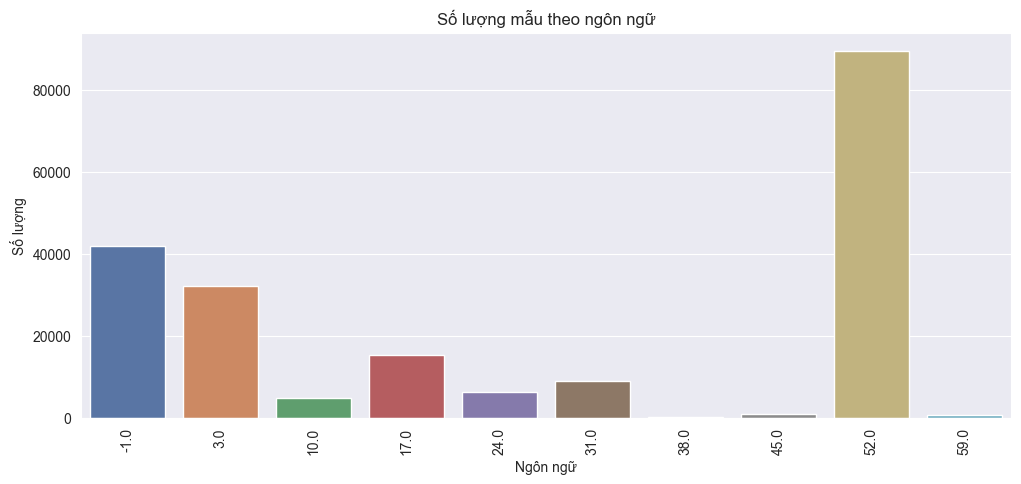

In [263]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
ax = sns.countplot(x='language', data=df_song, palette='deep')
ax.set_title('Số lượng mẫu theo ngôn ngữ')
ax.set_xlabel('Ngôn ngữ')
ax.set_ylabel('Số lượng')
plt.xticks(rotation=90)
plt.show()

In [264]:
df_members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

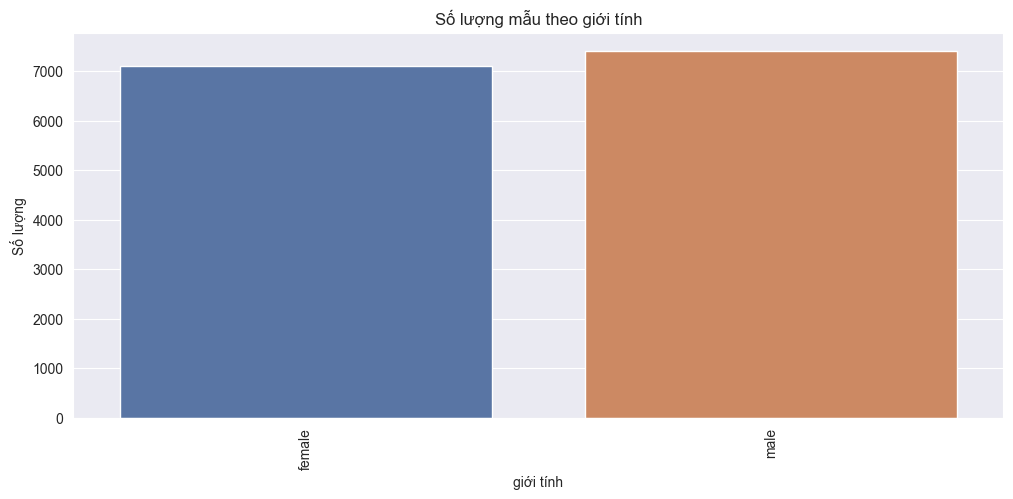

In [265]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
ax = sns.countplot(x='gender', data=df_members, palette='deep')
ax.set_title('Số lượng mẫu theo giới tính')
ax.set_xlabel('giới tính')
ax.set_ylabel('Số lượng')
plt.xticks(rotation=90)
plt.show()

C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

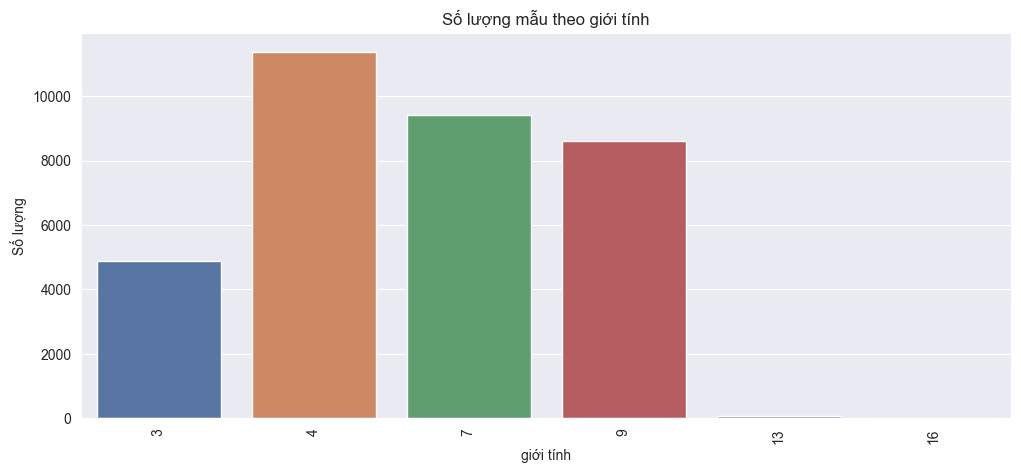

In [266]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
ax = sns.countplot(x='registered_via', data=df_members, palette='deep')
ax.set_title('Số lượng mẫu theo giới tính')
ax.set_xlabel('giới tính')
ax.set_ylabel('Số lượng')
plt.xticks(rotation=90)
plt.show()

In [267]:
df_train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [268]:
len(df_train)

200000

C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

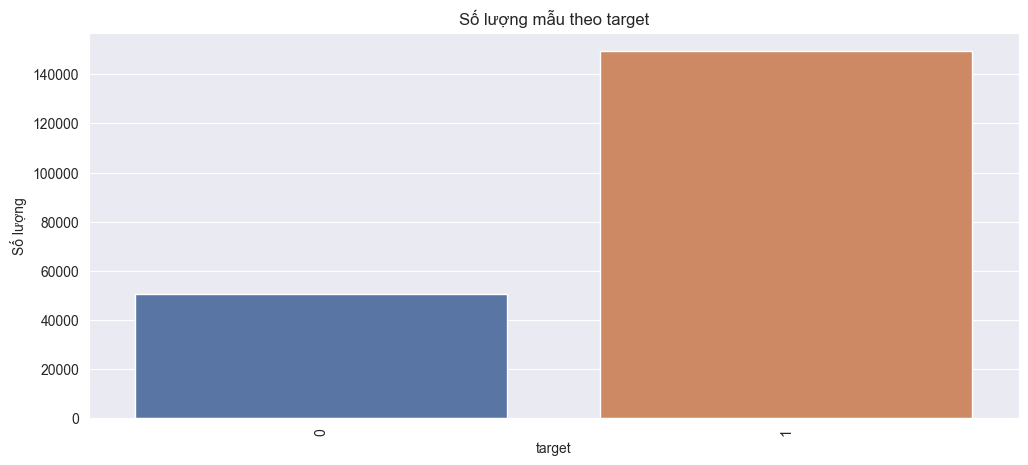

In [269]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
ax = sns.countplot(x='target', data=df_train, palette='deep')
ax.set_title('Số lượng mẫu theo target')
ax.set_xlabel('target')
ax.set_ylabel('Số lượng')
plt.xticks(rotation=90)
plt.show()

In [270]:
duplicate_percentage = df_train['song_id'].duplicated().mean() * 100

print(f'Phần trăm giá trị trùng lặp trong cột song_id là: {duplicate_percentage:.2f}%')

Phần trăm giá trị trùng lặp trong cột song_id là: 77.77%


C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

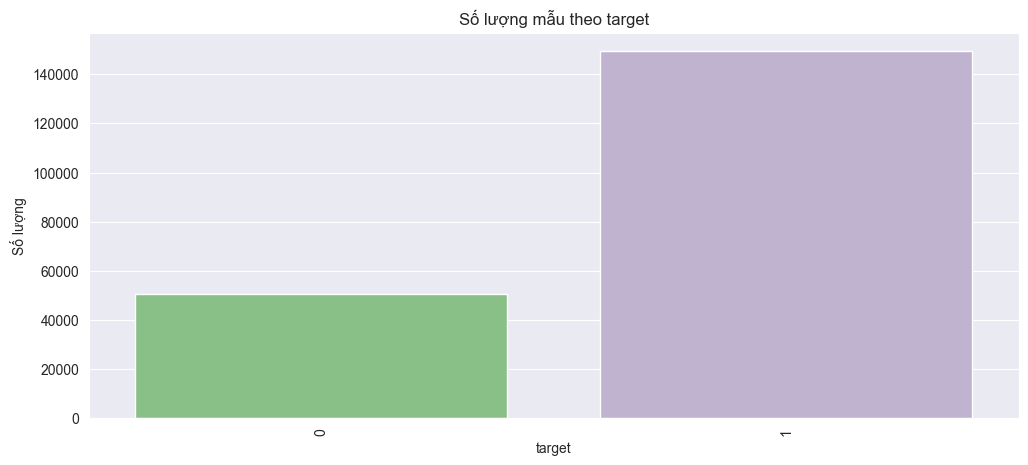

In [271]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
ax = sns.countplot(x='target', data=df_train, palette='Accent')
ax.set_title('Số lượng mẫu theo target')
ax.set_xlabel('target')
ax.set_ylabel('Số lượng')
plt.xticks(rotation=90)
plt.show()

In [272]:
for i in df_song_extra_info:
    print(f'phần trăm null {i} là : ',(df_song_extra_info[i].isnull().sum()/len(df_song_extra_info[i]))*100)

phần trăm null song_id là :  0.0
phần trăm null name là :  0.0
phần trăm null isrc là :  12.5945


In [273]:
for i in df_song:
    print(f'phần trăm null {i} là : ',(df_song[i].isnull().sum()/len(df_song[i]))*100)

phần trăm null song_id là :  0.0
phần trăm null song_length là :  0.0
phần trăm null genre_ids là :  2.2115
phần trăm null artist_name là :  0.0
phần trăm null composer là :  42.8565
phần trăm null lyricist là :  74.98899999999999
phần trăm null language là :  0.0


In [274]:
df_song_extra_info['name'].fillna(' ', inplace = True)
df_song_extra_info['isrc'].fillna(' ', inplace = True)
df_song['genre_ids'].fillna(' ', inplace = True)
df_song['composer'].fillna(' ', inplace = True)
df_song['lyricist'].fillna(' ', inplace = True)
df_song['language'].fillna(52.0, inplace = True)

In [275]:
df_train.isnull().sum()

msno                     0
song_id                  0
source_system_tab      576
source_screen_name    9367
source_type            363
target                   0
dtype: int64

In [276]:
df_train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [277]:
df_train.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [278]:
df_train.rename(columns={'msno':'user_id'},  inplace = True)
df_train.head(5)

,user_id,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [279]:
df = df_train.merge(df_song, on = 'song_id')

In [280]:
df.columns

Index(['user_id', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language'],
      dtype='object')

In [281]:
df.head(5)

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,247803,1259,Desiigner,Sidney Selby| Adnan Khan,,52.0
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,discover,Discover Genre,online-playlist,1,247803,1259,Desiigner,Sidney Selby| Adnan Khan,,52.0
2,XMkoCF4lkuInFshS1maokU4hZEQI2L1ZFQ3Cf7xg184=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,my library,Local playlist more,local-playlist,1,247803,1259,Desiigner,Sidney Selby| Adnan Khan,,52.0
3,kpCpM9wsXhj+Maa6kRAvUJJzE1dyeyPmBDtPoUr4a1o=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,my library,Local playlist more,local-playlist,1,247803,1259,Desiigner,Sidney Selby| Adnan Khan,,52.0
4,jiMKblWJS85kSNBCNvyW9Vz3nlfDfQQbuvPczyWMY1U=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,my library,Local playlist more,local-library,1,247803,1259,Desiigner,Sidney Selby| Adnan Khan,,52.0


In [282]:
df = df.drop(['song_length','language'], axis = 1)

In [283]:
df.head(5)

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,genre_ids,artist_name,composer,lyricist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,1259,Desiigner,Sidney Selby| Adnan Khan,
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,discover,Discover Genre,online-playlist,1,1259,Desiigner,Sidney Selby| Adnan Khan,
2,XMkoCF4lkuInFshS1maokU4hZEQI2L1ZFQ3Cf7xg184=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,my library,Local playlist more,local-playlist,1,1259,Desiigner,Sidney Selby| Adnan Khan,
3,kpCpM9wsXhj+Maa6kRAvUJJzE1dyeyPmBDtPoUr4a1o=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,my library,Local playlist more,local-playlist,1,1259,Desiigner,Sidney Selby| Adnan Khan,
4,jiMKblWJS85kSNBCNvyW9Vz3nlfDfQQbuvPczyWMY1U=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,my library,Local playlist more,local-library,1,1259,Desiigner,Sidney Selby| Adnan Khan,


In [284]:
df = df.merge(df_song_extra_info, on = 'song_id')
df.head(5)

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,genre_ids,artist_name,composer,lyricist,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show,USLXJ1607334
1,2a3A+ajDeDgM3C3ET3ejIZ6moZbOLab9e7+cj9qFyI4=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,discover,Online playlist more,online-playlist,1,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show,USLXJ1607334
2,saNgxsUQwx4IXBRgFF0w3uJN6KzvQBEv3dI7dDaz97g=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,discover,Online playlist more,online-playlist,1,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show,USLXJ1607334
3,aMB9nC9PVKXsk/K++qMMG0in0dvk2XiUFuAnr10qiac=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,my library,Local playlist more,local-library,1,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show,USLXJ1607334
4,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,t0aT90DlS1TGncgnKoL0SvfAWEr3Dl72QBVcokmKfLc=,my library,Local playlist more,local-library,1,465,Lindsey Stirling,Lindsey Stirling| Dia Frampton| SILAS,,We Are Giants,QMF921450114


In [285]:
df = df.drop('isrc', axis = 1)

In [286]:
df.rename(columns = {'name':'song_name'}, inplace = True)
df.head(5)

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show
1,2a3A+ajDeDgM3C3ET3ejIZ6moZbOLab9e7+cj9qFyI4=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,discover,Online playlist more,online-playlist,1,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show
2,saNgxsUQwx4IXBRgFF0w3uJN6KzvQBEv3dI7dDaz97g=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,discover,Online playlist more,online-playlist,1,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show
3,aMB9nC9PVKXsk/K++qMMG0in0dvk2XiUFuAnr10qiac=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,my library,Local playlist more,local-library,1,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show
4,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,t0aT90DlS1TGncgnKoL0SvfAWEr3Dl72QBVcokmKfLc=,my library,Local playlist more,local-library,1,465,Lindsey Stirling,Lindsey Stirling| Dia Frampton| SILAS,,We Are Giants


In [287]:
df['genre_ids'].value_counts()

genre_ids
465                21965
458                 7562
1609                2179
444                 1934
921                 1814
                   ...  
786|947|726|958        1
1152|786               1
2022|359               1
829|458                1
786|947|726            1
Name: count, Length: 127, dtype: int64

In [288]:
df['genre_ids'] = df['genre_ids'].str.replace('|', ' ', regex = True)
df['genre_ids'].value_counts()

genre_ids
 4 6 5                             21965
 4 5 8                              7562
 1 6 0 9                            2179
 4 4 4                              1934
 9 2 1                              1814
                                   ...  
 7 8 6 | 9 4 7 | 7 2 6 | 9 5 8         1
 1 1 5 2 | 7 8 6                       1
 2 0 2 2 | 3 5 9                       1
 8 2 9 | 4 5 8                         1
 7 8 6 | 9 4 7 | 7 2 6                 1
Name: count, Length: 127, dtype: int64

In [289]:
df.head(5)

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1 0 1 1,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show
1,2a3A+ajDeDgM3C3ET3ejIZ6moZbOLab9e7+cj9qFyI4=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,discover,Online playlist more,online-playlist,1,1 0 1 1,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show
2,saNgxsUQwx4IXBRgFF0w3uJN6KzvQBEv3dI7dDaz97g=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,discover,Online playlist more,online-playlist,1,1 0 1 1,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show
3,aMB9nC9PVKXsk/K++qMMG0in0dvk2XiUFuAnr10qiac=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,my library,Local playlist more,local-library,1,1 0 1 1,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,,Star Of The Show
4,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,t0aT90DlS1TGncgnKoL0SvfAWEr3Dl72QBVcokmKfLc=,my library,Local playlist more,local-library,1,4 6 5,Lindsey Stirling,Lindsey Stirling| Dia Frampton| SILAS,,We Are Giants


In [290]:
df['artist_name'].value_counts()

artist_name
周杰倫 (Jay Chou)                             1970
Various Artists                            1938
林俊傑 (JJ Lin)                               1110
The Chainsmokers                            917
玖壹壹                                         777
                                           ... 
Claudio Abbado| Berliner Philharmoniker       1
原子霏                                           1
新兵日記大樂兵                                       1
Belle And Sebastian                           1
Aaron Smith feat. Luvli                       1
Name: count, Length: 2958, dtype: int64

In [291]:
df['lyricist'].value_counts()

lyricist
                                                                                              17451
方文山                                                                                            1445
廖建至 洪瑜鴻 陳皓宇                                                                                     653
Andrew Taggart| Shaun Frank| Frederic Kennett| Ashley Frangipane| Isaac Slade| Joseph King      605
林夕                                                                                              577
                                                                                              ...  
Stanley Huang| Wei Kai Cui                                                                        1
Chris Cron| Ricky Sans                                                                            1
Phoebe Ryan| Kyle Shearer| Nathaniel Campany                                                      1
里歐娜|Ryan Tedder|Evan Boggart                                                               

In [292]:
df['artist_name'] = df['artist_name'].str.replace('|',' ',regex = True)
df['composer'] = df['composer'].str.replace('/',' ', regex = True)
df['lyricist'] = df['lyricist'].str.replace('/', '', regex = True)
df['artist_name'] = df['artist_name'].str.lower()
df['composer'] = df['composer'].str.lower()
df['lyricist'] = df['lyricist'].str.lower()

In [293]:
df = df.drop(['source_screen_name','source_system_tab'], axis = 1)
df.head(5)

,user_id,song_id,source_type,target,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show
1,2a3A+ajDeDgM3C3ET3ejIZ6moZbOLab9e7+cj9qFyI4=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show
2,saNgxsUQwx4IXBRgFF0w3uJN6KzvQBEv3dI7dDaz97g=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show
3,aMB9nC9PVKXsk/K++qMMG0in0dvk2XiUFuAnr10qiac=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,local-library,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show
4,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,t0aT90DlS1TGncgnKoL0SvfAWEr3Dl72QBVcokmKfLc=,local-library,1,4 6 5,l i n d s e y s t i r l i n g,lindsey stirling| dia frampton| silas,,We Are Giants


In [294]:
df['song_detail'] = df['artist_name'] +' '+df['composer'] + df['lyricist']
df.head(5)

,user_id,song_id,source_type,target,genre_ids,artist_name,composer,lyricist,song_name,song_detail
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
1,2a3A+ajDeDgM3C3ET3ejIZ6moZbOLab9e7+cj9qFyI4=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
2,saNgxsUQwx4IXBRgFF0w3uJN6KzvQBEv3dI7dDaz97g=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
3,aMB9nC9PVKXsk/K++qMMG0in0dvk2XiUFuAnr10qiac=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,local-library,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
4,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,t0aT90DlS1TGncgnKoL0SvfAWEr3Dl72QBVcokmKfLc=,local-library,1,4 6 5,l i n d s e y s t i r l i n g,lindsey stirling| dia frampton| silas,,We Are Giants,l i n d s e y s t i r l i n g lindsey stir...


In [295]:
df['user_id'].value_counts()

user_id
x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=    107
TVMaA7AErwJbZo9mOTs2nIuNbUfJgr9VHkkrOLhlMs8=     93
COKcxAcU8S2UMils+HG9N1Vh0B92BeVfUdrXbp4/qZY=     74
EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=     67
qsqSF3Vdoq3/K+5ixLV5Inym1cCQw8i0ghDqyRaOJm8=     59
                                               ... 
cIsbG16BR7NHlh1gAYwOthIblpWuUwB1tN2Goa5veuA=      1
4Vj38dNkXaP5lyY0PC3L79WJwhLlKTDGAKSteY31AuI=      1
Lo7liTThP//YZ86OL1y7euOY46G6KrL8aJJ7utdRNHU=      1
u8KUUuPMyI9RrdmXqAWPxcCn3iZk1RSYQW0BGWe630g=      1
iRiSKezs0fxe6jnqhtKmS8JC2+gBx/C47sbcPjA5fG4=      1
Name: count, Length: 8125, dtype: int64

In [296]:
len(df['user_id'].value_counts())

8125

In [297]:
df.duplicated().sum()

0

In [298]:
df['song_detail'].duplicated().sum()

37062

In [299]:
df.shape

(43291, 10)

In [300]:
df = df.drop('user_id', axis =1)
df.head(5)

,song_id,source_type,target,genre_ids,artist_name,composer,lyricist,song_name,song_detail
0,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
1,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
2,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
3,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,local-library,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
4,t0aT90DlS1TGncgnKoL0SvfAWEr3Dl72QBVcokmKfLc=,local-library,1,4 6 5,l i n d s e y s t i r l i n g,lindsey stirling| dia frampton| silas,,We Are Giants,l i n d s e y s t i r l i n g lindsey stir...


In [301]:
df.duplicated().sum()

26071

In [302]:
df = df.drop_duplicates()
df.head(5)

,song_id,source_type,target,genre_ids,artist_name,composer,lyricist,song_name,song_detail
0,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,online-playlist,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
3,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,local-library,1,1 0 1 1,t h o m a s r h e t t,thomas rhett| rhett akins| ben hayslip,,Star Of The Show,t h o m a s r h e t t thomas rhett| rhett ...
4,t0aT90DlS1TGncgnKoL0SvfAWEr3Dl72QBVcokmKfLc=,local-library,1,4 6 5,l i n d s e y s t i r l i n g,lindsey stirling| dia frampton| silas,,We Are Giants,l i n d s e y s t i r l i n g lindsey stir...
5,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,top-hits-for-artist,0,4 6 5,林 俊 傑 ( j j l i n ),林俊傑,林怡鳳,手心的薔薇 (Beautiful) feat. G.E.M.鄧紫棋,林 俊 傑 ( j j l i n ) 林俊傑林怡鳳
6,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,local-playlist,1,4 6 5,林 俊 傑 ( j j l i n ),林俊傑,林怡鳳,手心的薔薇 (Beautiful) feat. G.E.M.鄧紫棋,林 俊 傑 ( j j l i n ) 林俊傑林怡鳳


In [303]:
df.reset_index(inplace = True)

In [304]:
df.shape

(17220, 10)

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

matrix = tfidf.fit_transform(df['song_detail'])

matrix

<17220x8210 sparse matrix of type '<class 'numpy.float64'>'
	with 44078 stored elements in Compressed Sparse Row format>

In [306]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sml = cosine_similarity(matrix)

cos_sml

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [308]:
sorted(list(enumerate(cos_sml[0])), reverse=True , key= lambda x: x[1])[1:6]

[(1, 1.0000000000000002),
 (16275, 0.7769189110679557),
 (11748, 0.1690113660026669),
 (7225, 0.16415115380208672),
 (7226, 0.16415115380208672)]

In [309]:
def recomands(song):
    song_ = df[df['song_name']==song].index[0]
    distance = cos_sml[song_]
    song_list = sorted(list(enumerate(cos_sml[0])), reverse=True , key= lambda x: x[1])[1:6]
    for i in song_list:
        print(i[0])

In [314]:
def recommend(song):
    if song in df['song_name'].values:
        song_ = df[df['song_name'] == song].index[0]
        distance = cos_sml[song_]
        song_list = sorted(list(enumerate(cos_sml[0])), reverse=True, key=lambda x: x[1])[1:10]
        for i in song_list:
            print(df.iloc[i[0]].song_name)
    else:
        print(f"Bài hát '{song}' không tồn tại trong dữ liệu.")


In [316]:
recommend('Star Of The Show')

Star Of The Show
Playing With Fire
Butterfly Kisses
Mr. Q (Mr.Q)
Mr. Q (Mr.Q)
Mr. Q (Mr.Q)
Mr. Q (Mr.Q)
Mr. Q (Mr.Q)
I Just Wanna Love You
